In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv('C.csv', delimiter = '\t')

In [2]:
mask = df.loc[:,'baseRent'] > df.loc[:,'totalRent']
df = df.drop(df.loc[mask,:].index)

In [3]:
df['date']

0       May-19
1       May-19
2       Oct-19
3       May-19
4       Feb-20
         ...  
2995    Feb-20
2996    May-19
2997    Sep-18
2998    Feb-20
2999    May-19
Name: date, Length: 2993, dtype: object

In [4]:
for col in df.columns:
    if df[col].dtype == 'float':
        df[col] = df[col].fillna(df[col].mean())

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])

In [6]:
dat = df
dat=dat.join(pd.get_dummies(dat.date, dtype=float)).drop(['date'], axis =1)

In [7]:
for col in ['pictureCount']:
      dat[col]=dat[col].astype('float')

In [8]:
min_value = dat['totalRent'].min()
max_value = dat['totalRent'].max()
dat['normalized_value'] = ((0.99 - 0.01) * (dat['totalRent'] - min_value) / (max_value - min_value)) + 0.01
X = dat.drop(['normalized_value','totalRent'], axis =1).to_numpy().reshape(-1,9)
y = dat['normalized_value'].to_numpy()

In [9]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y,test_size=0.4, random_state=55)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test,test_size=0.5, random_state=55)

linear=LinearRegression()
linear.fit(X_train,y_train)
y_pred_lin = linear.predict(X_val)
mean_squared_error(y_val, y_pred_lin)

0.000847166912977633

In [13]:
poly_tr_errors = []
poly_val_errors = []
poly_degrees = []
lin_regr = LinearRegression(fit_intercept=False)
for degree in range(1, 10):
    poly = PolynomialFeatures(degree=degree) 
    X_train_poly = poly.fit_transform(X_train) 
    lin_regr.fit(X_train_poly, y_train)
    y_pred_poly_train = lin_regr.predict(X_train_poly)
    poly_tr_error = mean_squared_error(y_train, y_pred_poly_train)
    X_val_poly = poly.fit_transform(X_val)
    y_pred_poly__val = lin_regr.predict(X_val_poly)
    poly_val_error = mean_squared_error(y_val, y_pred_poly__val)
    poly_tr_errors.append(poly_tr_error)
    poly_val_errors.append(poly_val_error)
    poly_degrees.append(degree)
print(poly_tr_errors)
print(poly_val_errors)

[0.0011293337508034103, 0.0005246424627486828, 0.000375317567786922, 0.0003528063562241336, 0.00017505217624280616, 0.0008040842774417295, 0.0008669343578439873, 0.0021565604946663184, 0.0041896432877787096]
[0.0008471669129776314, 0.0006823684127609282, 0.0036540394352645514, 0.3027930580693332, 113.27413852758623, 185932.02477131062, 6468236.4014236815, 140331382.51368305, 3024617050.690414]


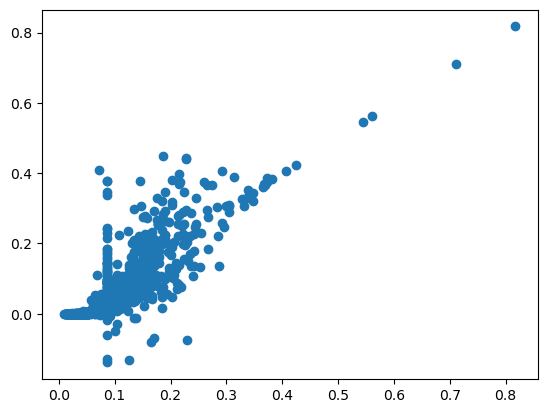

In [14]:
import matplotlib.pyplot as plt

plt.plot(y_train, y_pred_poly_train, 'o')

In [15]:
lin_regr = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
lin_regr.fit(X_train_poly, y_train)
y_pred_poly_train = lin_regr.predict(X_train_poly)
poly_tr_error = mean_squared_error(y_train, y_pred_poly_train)
X_val_poly = poly.fit_transform(X_val)
y_pred_poly_val = lin_regr.predict(X_val_poly)
poly_val_error = mean_squared_error(y_val, y_pred_poly_val)
print(poly_tr_error)
print(poly_val_error)

0.0005246424627486828
0.0006823684127609282


In [22]:
forest_tr_errors = []
forest_val_errors = []
m_depths = []
for depth in range(10, 17):
    forest_regr = RandomForestRegressor(max_depth=depth) 
    forest_regr.fit(X_train, y_train)
    y_pred_forest_train = forest_regr.predict(X_train)
    forest_tr_error = mean_squared_error(y_train, y_pred_forest_train)
    y_pred_forest_val = forest_regr.predict(X_val)
    forest_val_error = mean_squared_error(y_val, y_pred_forest_val)
    forest_tr_errors.append(forest_tr_error)
    forest_val_errors.append(forest_val_error)
    m_depths.append(degree)
print(forest_tr_errors)
print(forest_val_errors)

[0.00015780078227448031, 0.00014505069099183043, 0.00012569928938157624, 0.00011640012538904386, 0.00012416586265612804, 0.00012928822325607864, 0.0001122110117085392]
[0.0010541837220832948, 0.0010265204026362565, 0.0010276694970518937, 0.0010374618422396343, 0.0010793666345742037, 0.0010459245408130215, 0.0010558761020826504]


In [26]:
forest_regr = RandomForestRegressor(max_depth=11)
forest_regr.fit(X_train, y_train)
y_pred_forest_train = forest_regr.predict(X_train)
forest_tr_error = mean_squared_error(y_train, y_pred_forest_train)
y_pred_forest_val = forest_regr.predict(X_val)
forest_val_error = mean_squared_error(y_val, y_pred_forest_val)
print(forest_tr_error)
print(forest_val_error)

0.00011597125813876844
0.0010797273276710432


In [18]:
X_test_poly = poly.fit_transform(X_test)
y_poly_test_pred = lin_regr.predict(X_test_poly)
poly_test_error = mean_squared_error(y_test, y_poly_test_pred)
y_forest_test_pred = forest_regr.predict(X_test)
forest_test_error = mean_squared_error(y_test, y_forest_test_pred)
print(poly_test_error)
print(forest_test_error)

0.0009929824396548252
0.001514240972891766
